In [2]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os

#get current directory (the directory where this notebook is located)
cdir = os.getcwd()

#get the grandmother directory (two levels up)
grandma_dir = os.path.abspath(os.path.join(cdir, os.pardir, os.pardir))

# Construct the path to the py directory
py_dir = os.path.join(grandma_dir, 'py')

for dir in [py_dir]:
    #include function-directories to the system path
    if dir not in sys.path:
        sys.path.append(dir)
        print(f"Included {dir} in sys.path")

#verify  directories
print(f"Current directory: {cdir}")
print(f"Grandmother directory: {grandma_dir}")
print(f"System path: {sys.path}")


/Users/ronja/Documents/GitHub/neural-fields/bifs


In [4]:
table_list = []
new_table_list = []

path = cdir + 'csv'

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        df = pd.read_csv(path + '/' + filename, header=0)
        df['name'] = filename
        table_list.append(df)
        new_table_list.append(filename.split(".")[0])
    
Z = [x for _,x in sorted(zip(new_table_list,table_list))]

df = Z[0]

name = df['name'][0]
name

'bif_sigmai06_taui06.csv'

In [5]:
def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels, idx_x, idx_y

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2341/2391535071.py:40: UserWarning: No contour levels were found within the data range.
  ax[i,j].contour(turings, origin='lower', vmin=0, vmax=2, levels=0, cmap='RdGy', linestyles='dashed')
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2341/2391535071.py:40: UserWarning: No contour levels were found within the data range.
  ax[i,j].contour(turings, origin='lower', vmin=0, vmax=2, levels=0, cmap='RdGy', linestyles='dashed')
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2341/2391535071.py:40: UserWarning: No contour levels were found within the data range.
  ax[i,j].contour(turings, origin='lower', vmin=0, vmax=2, levels=0, cmap='RdGy', linestyles='dashed')
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2341/2391535071.py:40: UserWarning: No contour levels were found within the data range.
  ax[i,j].contour(turings, origin='lower', vmin=0, vmax=2, levels=0, cmap='RdGy', linestyles='dashed')


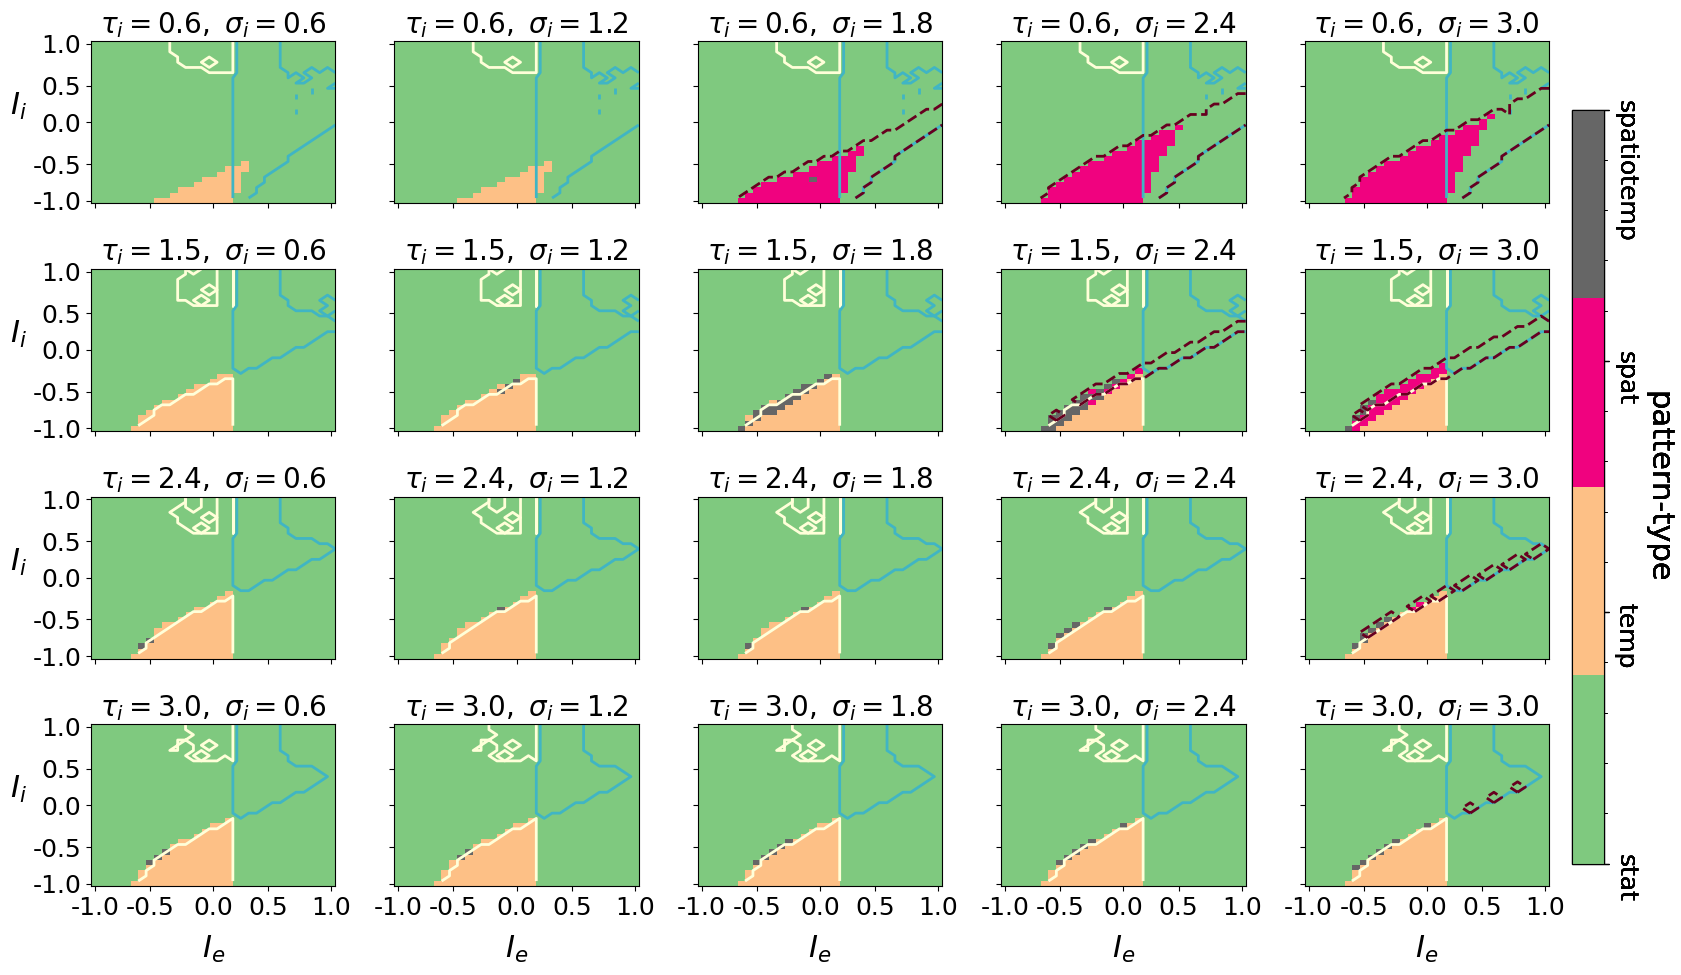

In [17]:
rows = 4
cols = 5

fig, ax = plt.subplots(rows, cols, figsize = (16, 10), 
                       sharex = True, sharey = True)

count = 0

xaxis = 'I_e'
yaxis = 'I_i'

colorbar = True

for j in range(cols):
    for i in range(rows):
        
        df = Z[count]
        count+=1
        
        path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
        plt.style.use(path + 'template.mplstyle')
        
        p_colors = cm.get_cmap('Accent', 4)
        
        name = df['name'][0]
        title = r'$\tau_i=%s.%s,\ \sigma_i=%s.%s$' %(name[-6], name[-5], name[10], name[11])
        
        stabis = df.pivot_table('stability', columns=xaxis, index=yaxis)
        turings = df.pivot_table('turing', columns=xaxis, index=yaxis)
        p_randoms = df.pivot_table('p_random', columns=xaxis, index=yaxis)
     #   p_downs = df.pivot_table('p_down', columns=xaxis, index=yaxis) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
     #   compare = p_randoms.eq(p_downs) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
        
        nmb_labels = 5
                    
        xlabels, ylabels, idx_x, idx_y = setAxes(stabis, nmb_labels)
        
        pos = ax[i,j].imshow(p_randoms, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors)
        ax[i,j].contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu')
        ax[i,j].contour(turings, origin='lower', vmin=0, vmax=2, levels=0, cmap='RdGy', linestyles='dashed')
    #    ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors='darkslategrey', linestyles='dotted') #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
        
        
        ax[i,j].set(title=title)
        
        
            
        if j==0:
            ax[i,j].yaxis.set_major_locator(ticker.FixedLocator(idx_y))
            ax[i,j].set_yticklabels(labels=ylabels)
            ax[i,j].set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)
            
            ax[i,j].label_outer()
            
        
        if i==rows-1:
            ax[i,j].xaxis.set_major_locator(ticker.FixedLocator(idx_x))
            ax[i,j].set_xticklabels(labels=xlabels)
        
            ax[i,j].set_xlabel(r'$%s$' %xaxis, labelpad=10, rotation=0)
            ax[i,j].label_outer()
            
            
    mini = 1
    maxi = 4
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=0)
    cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.99,.124,.02,.754])
        cbar = ax[int(rows/2), int(cols/2)].figure.colorbar(pos, ax=ax[int(rows/2), int(cols/2)], ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_labels, rotation=-90)
        
        
        cbar.minorticks_on()
        

       # plt.legend(loc='lower right')
    
    fig.tight_layout(pad=0.90)
        
            